## 随机梯度下降法

### 全量梯度下降法， 用来和下面的随机梯度做对比的

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

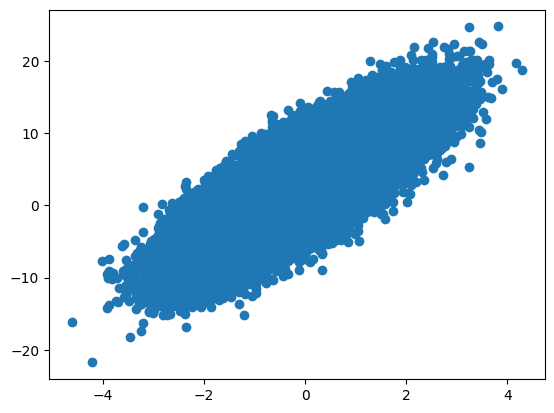

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [5]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 275 ms, sys: 119 ms, total: 394 ms
Wall time: 228 ms


In [6]:
theta

array([3.00658095, 4.00922757])

### 随机梯度下降法

In [7]:
# 求随机梯队，  公式
# X_b_i  X_b中的 第ｉ个样本 只有一行记录
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):
    # 经验值
    t0, t1 = 5, 50
    # 学习率 随着迭代次数（时间） ，慢慢变小。 
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [10]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m)

CPU times: user 688 ms, sys: 4.49 ms, total: 692 ms
Wall time: 700 ms


In [11]:
theta

array([3.00181245, 4.03910019])